<a href="https://colab.research.google.com/github/hdjwis/FastballPrediction/blob/main/FastballPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pybaseball

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
from pybaseball import statcast
from pybaseball import playerid_lookup

# get data for July 15th, 2017 from pybaseball
data = statcast('2024-01-01', '2024-12-31')

/Users/adarshraju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


This is a large query, it may take a moment to complete


/Users/adarshraju/Library/Python/3.9/lib/python/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates
Skipping offseason dates


  0%|          | 1/246 [00:00<03:23,  1.20it/s]/Users/adarshraju/Library/Python/3.9/lib/python/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
/Users/adarshraju/Library/Python/3.9/lib/python/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  1%|          | 2/246 [00:01<02:32,  1.60it/s]/Users/adarshraju/Library/Python/3.9/lib/python/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in 

In [4]:
data.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
161,KC,2024-10-30,77.5,-1.11,5.65,"Buehler, Walker",657077,621111,strikeout,swinging_strike_blocked,...,<NA>,5.23,-1.08,1.08,53.2,25.834292,-25.475081,32.831211,34.481443,57.315365
169,KC,2024-10-30,78.7,-1.01,5.73,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,<NA>,5.28,-1.05,1.05,54.2,35.519261,-41.027263,35.112657,29.474286,57.624781
178,FC,2024-10-30,93.1,-1.19,5.53,"Buehler, Walker",657077,621111,NaN,swinging_strike,...,<NA>,1.89,-0.53,0.53,44.8,19.401316,-32.989729,26.71055,16.32129,37.919472
187,KC,2024-10-30,78.5,-1.19,5.7,"Buehler, Walker",657077,621111,NaN,ball,...,<NA>,5.16,-1.05,1.05,51.9,<NA>,<NA>,<NA>,<NA>,<NA>
197,KC,2024-10-30,77.4,-1.23,5.78,"Buehler, Walker",669224,621111,strikeout,swinging_strike,...,<NA>,5.2,-1.08,1.08,50.0,22.6438,-12.035832,32.683497,40.578398,40.302028


In [5]:
data = data.drop(['release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'events', 'description', 'spin_dir', 'spin_rate_deprecated',
           'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type',
           'game_year',	'pfx_x',	'pfx_z',	'plate_x',	'plate_z', 'hc_x',	'hc_y',	'tfs_deprecated',	'tfs_zulu_deprecated',	'umpire',	'sv_id',	'vx0',	'vy0',
           'vz0',	'ax',	'ay',	'az',	'sz_top',	'sz_bot',	'hit_distance_sc',	'launch_speed',	'launch_angle',	'effective_speed',	'release_spin_rate',
           'release_extension',	'game_pk',	'fielder_2',	'fielder_3',	'fielder_4',	'fielder_5',	'fielder_6',	'fielder_7',	'fielder_8',	'fielder_9',
           'release_pos_y',	'estimated_ba_using_speedangle',	'estimated_woba_using_speedangle',	'woba_value',	'woba_denom',	'babip_value',	'iso_value',
           'launch_speed_angle', 	'home_score',	'away_score', 'post_away_score',	'post_home_score',	'post_bat_score',	'post_fld_score',
           'spin_axis',	'delta_home_win_exp',	'delta_run_exp',	'bat_speed',	'swing_length',	'estimated_slg_using_speedangle',	'delta_pitcher_run_exp',
           'hyper_speed',	'home_score_diff', 'home_win_exp',	'bat_win_exp', 'age_pit_legacy',	'age_bat_legacy',	'age_pit',	'age_bat',
           'n_priorpa_thisgame_player_at_bat',	'pitcher_days_since_prev_game',	'batter_days_since_prev_game',	'pitcher_days_until_next_game',
           'batter_days_until_next_game',	'api_break_z_with_gravity',	'api_break_x_arm',	'api_break_x_batter_in',	'arm_angle', 'bat_score', 'fld_score',
           'attack_angle', 'attack_direction', 'swing_path_tilt','intercept_ball_minus_batter_pos_x_inches','intercept_ball_minus_batter_pos_y_inches'], axis=1)

In [6]:
data.shape

(757713, 20)

In [7]:
data['pitch_type'].value_counts()


pitch_type
FF    237550
SI    117341
SL    114424
CH     75732
FC     60923
ST     49242
CU     46454
FS     23063
KC     13354
SV      3280
KN       971
FA       632
EP       575
FO       190
SC       182
CS        61
PO        55
Name: count, dtype: int64

In [8]:
data.dropna()
data.shape

(757713, 20)

In [9]:
data['on_3b'] = data['on_3b'].apply(lambda x: 1 if x > 0 else 0)
data['on_2b'] = data['on_2b'].apply(lambda x: 1 if x > 0 else 0)
data['on_1b'] = data['on_1b'].apply(lambda x: 1 if x > 0 else 0)
data['fastball'] = data['pitch_type'].apply(lambda x: 1 if x in ['FF', 'FC', 'SI'] else 0)
data = data.drop('pitch_type', axis=1)

In [10]:
data['on_3b'].value_counts()

on_3b
0    686878
1     70835
Name: count, dtype: int64

In [11]:
data['on_2b'].value_counts()

on_2b
0    616465
1    141248
Name: count, dtype: int64

In [12]:
data['on_1b'].value_counts()

on_1b
0    527641
1    230072
Name: count, dtype: int64

In [13]:
data['fastball'].value_counts()

fastball
1    415814
0    341899
Name: count, dtype: int64

In [14]:
data.head()

,game_date,pitcher,stand,p_throws,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,at_bat_number,pitch_number,pitch_name,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball
161,2024-10-30,621111,L,R,1,2,0,0,0,2,9,Bot,89,4,Knuckle Curve,Infield shade,Standard,-1,1,0
169,2024-10-30,621111,L,R,1,1,0,0,0,2,9,Bot,89,3,Knuckle Curve,Infield shade,Standard,-1,1,0
178,2024-10-30,621111,L,R,1,0,0,0,0,2,9,Bot,89,2,Cutter,Infield shade,Standard,-1,1,1
187,2024-10-30,621111,L,R,0,0,0,0,0,2,9,Bot,89,1,Knuckle Curve,Infield shade,Standard,-1,1,0
197,2024-10-30,621111,L,R,3,2,0,0,0,1,9,Bot,88,7,Knuckle Curve,Infield shade,Standard,-1,1,0


In [15]:
data['batter_handedness'] = data['stand'].apply(lambda x: 1 if x == 'R' else 0)
data['pitcher_handedness'] = data['p_throws'].apply(lambda x: 1 if x == 'R' else 0)
data = data.drop(['game_date', 'stand', 'p_throws', 'inning_topbot', 'at_bat_number', 'pitch_name'], axis=1)
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,Infield shade,Standard,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,Infield shade,Standard,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,Infield shade,Standard,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,Infield shade,Standard,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,Infield shade,Standard,-1,1,0,0,1


In [16]:
data['if_fielding_alignment'].value_counts()

if_fielding_alignment
Standard         497607
Infield shade    173195
Strategic         65103
Name: count, dtype: int64

In [17]:
data['of_fielding_alignment'].value_counts()

of_fielding_alignment
Standard          709143
Strategic          26761
4th outfielder         1
Name: count, dtype: int64

In [18]:
data['if_fielding_alignment'] = data['if_fielding_alignment'].apply(lambda x: 1 if x == 'Standard' else 0)
data['of_fielding_alignment'] = data['of_fielding_alignment'].apply(lambda x: 1 if x == 'Standard' else 0)

In [19]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [21]:
data.groupby(['balls','strikes'])['fastball'].value_counts()

balls  strikes  fastball
0      0        1           116497
                0            80866
       1        1            49659
                0            49530
       2        0            29883
                1            22775
1      0        1            42637
                0            29799
       1        1            38391
                0            37038
       2        0            40937
                1            32974
2      0        1            16803
                0             7553
       1        1            22560
                0            15884
       2        0            31864
                1            30681
3      0        1             6821
                0              921
       1        1            12242
                0             3547
       2        1            23773
                0            14077
4      2        1                1
Name: count, dtype: int64

In [22]:
data = data[data['balls'] != 4]

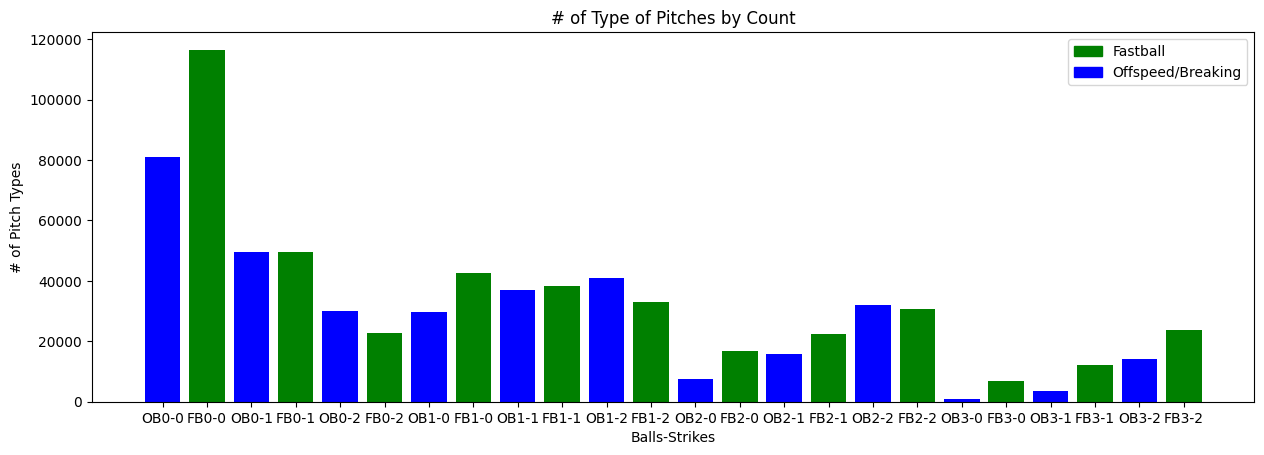

In [23]:
fig, ax = plt.subplots()

for i in np.sort(data['balls'].unique()):
  for j in np.sort(data['strikes'].unique()):
    for fastball_val in np.sort(data['fastball'].unique()):
      s = data[data['fastball'] == fastball_val].groupby(['balls','strikes'])['fastball'].value_counts()
      color = 'green' if fastball_val == 1 else 'blue'
      fastball = 'FB' if fastball_val == 1 else 'OB'
      ax.bar(x=f'{fastball}{i}-{j}', height=s[i][j], color=color)

plt.xlabel('Balls-Strikes')
plt.ylabel('# of Pitch Types')
plt.title('# of Type of Pitches by Count')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(15)
plt.show()


In [24]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [25]:
data.groupby(['on_1b', 'on_2b', 'on_3b'])['fastball'].value_counts()


on_1b  on_2b  on_3b  fastball
0      0      0      1           241046
                     0           193966
              1      1             9564
                     0             8899
       1      0      1            30602
                     0            28694
              1      1             7528
                     0             7341
1      0      0      1            80055
                     0            61859
              1      1            11337
                     0             9739
       1      0      1            26627
                     0            24028
              1      1             9054
                     0             7373
Name: count, dtype: int64

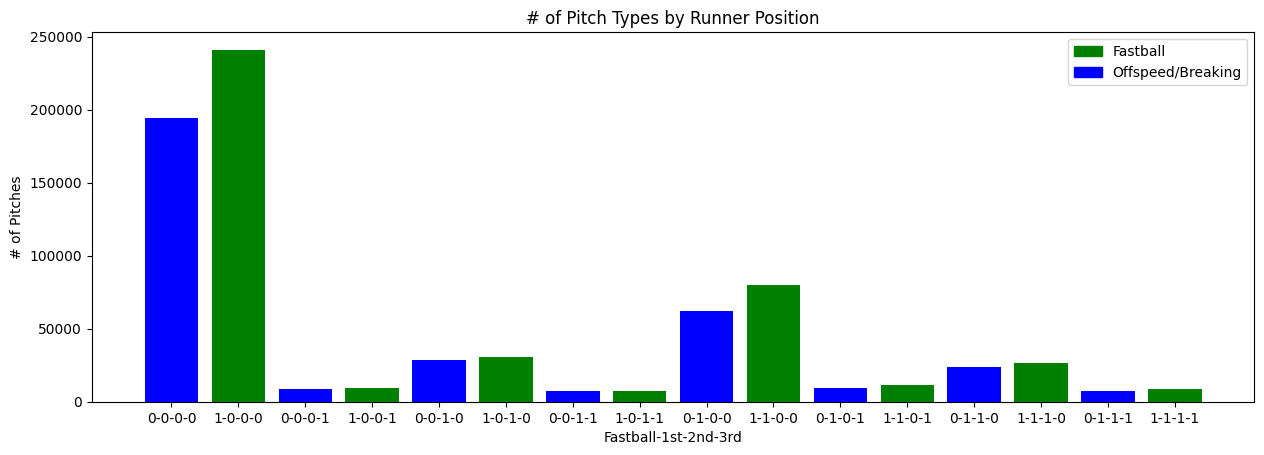

In [26]:
fig, ax = plt.subplots()

for i in data['on_1b'].unique():
  for j in data['on_2b'].unique():
    for k in data['on_3b'].unique():
      for fastball_val in data['fastball'].unique():
        s = data[data['fastball'] == fastball_val].groupby(['on_1b', 'on_2b', 'on_3b'])['fastball'].value_counts()
        color = 'green' if fastball_val == 1 else 'blue'
        ax.bar(x=f'{fastball_val}-{i}-{j}-{k}', height=s[i][j][k], color=color)


plt.xlabel('Fastball-1st-2nd-3rd')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by Runner Position')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(15)
plt.show()


In [27]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [28]:
data.groupby(['n_thruorder_pitcher'])['fastball'].value_counts()


n_thruorder_pitcher  fastball
1                    1           275122
                     0           213250
2                    1            94663
                     0            86263
3                    1            45162
                     0            41583
4                    1              866
                     0              803
Name: count, dtype: int64

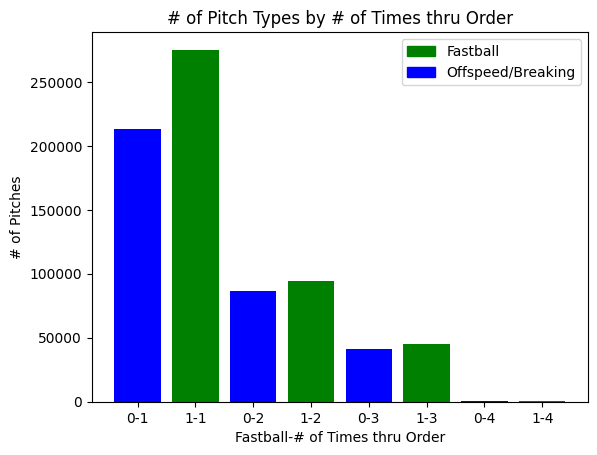

In [29]:
fig, ax = plt.subplots()

for i in np.sort(data['n_thruorder_pitcher'].unique()):
  for fastball_val in data['fastball'].unique():
    s = data[data['fastball'] == fastball_val].groupby(['n_thruorder_pitcher'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-# of Times thru Order')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by # of Times thru Order')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
plt.show()


In [30]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [31]:
data.groupby(['inning'])['fastball'].value_counts()


inning  fastball
1       1           51906
        0           35355
2       1           47987
        0           37786
3       1           45516
        0           39594
4       1           43968
        0           39841
5       1           44657
        0           39701
6       1           45493
        0           39732
7       1           47114
        0           39163
8       1           46960
        0           38761
9       1           37417
        0           28102
10      1            3476
        0            2724
11      1             797
        0             709
12      1             371
        0             325
13      1             124
        0              89
14      1              27
        0              17
Name: count, dtype: int64

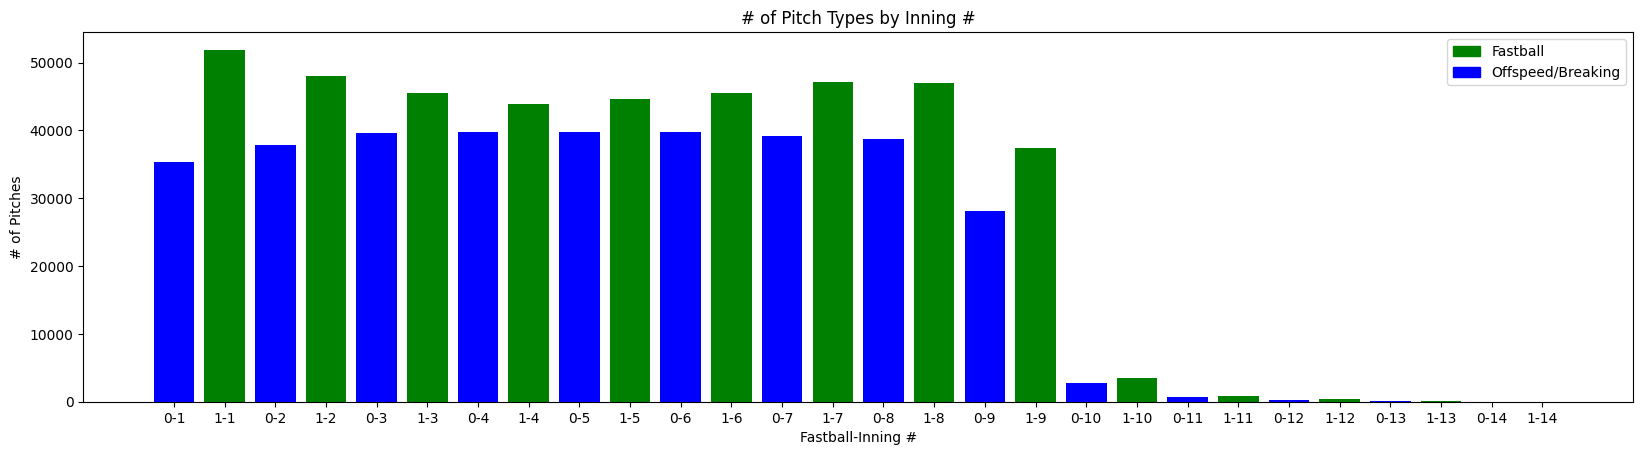

In [32]:
fig, ax = plt.subplots()

for i in np.sort(data['inning'].unique()):
  for fastball_val in data['fastball'].unique():
    s = data[data['fastball'] == fastball_val].groupby(['inning'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-Inning #')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by Inning #')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
fig.set_figwidth(20)
plt.show()


In [33]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


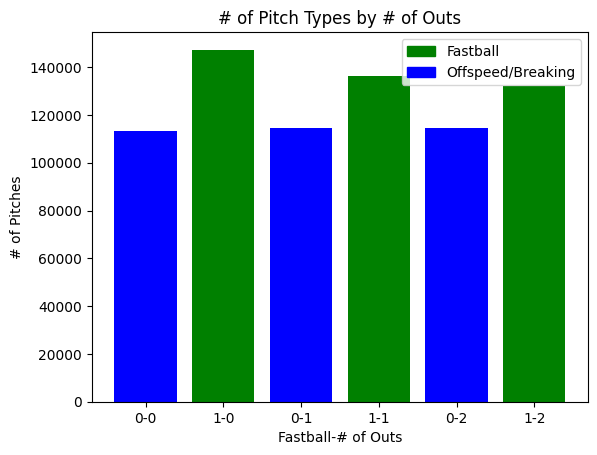

In [34]:
fig, ax = plt.subplots()

for i in np.sort(data['outs_when_up'].unique()):
  for fastball_val in np.sort(data['fastball'].unique()):
    s = data[data['fastball'] == fastball_val].groupby(['outs_when_up'])['fastball'].value_counts()
    color = 'green' if fastball_val == 1 else 'blue'
    ax.bar(x=f'{fastball_val}-{i}', height=s[i], color=color)


plt.xlabel('Fastball-# of Outs')
plt.ylabel('# of Pitches')
plt.title('# of Pitch Types by # of Outs')
green_patch = mpatches.Patch(color='green', label='Fastball')
blue_patch = mpatches.Patch(color='blue', label='Offspeed/Breaking')
ax.legend(handles=[green_patch, blue_patch])
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
169,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
178,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
187,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
197,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [37]:
X = data[['balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'n_thruorder_pitcher']]
y = data['fastball']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5689936189728328

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5687560626356876

In [41]:
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [100, 150],
          'max_depth': [2, 3],
          'min_samples_split': [3, 2],
          'min_samples_leaf': [1, 2],
          'max_features': [2, 3]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.5633780511142052

In [ ]:
gs.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [ ]:
rf_grid = RandomForestClassifier(min_samples_leaf=1, n_estimators=100, random_state=0)
params = {'max_depth': [4,5],
          'min_samples_split': [4, 5],
          'max_features': [4, 5]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.5722006295242934

In [ ]:
gs.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_split': 5}

In [ ]:
rf_grid = RandomForestClassifier(min_samples_leaf=1, n_estimators=100, random_state=0)
params = {'max_depth': [6, 7],
          'min_samples_split': [6, 7],
          'max_features': [6, 7]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.5734214051457343

In [ ]:
gs.best_params_

{'max_depth': 7, 'max_features': 6, 'min_samples_split': 6}

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.5724183895000099

In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness
161,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1
173,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1
180,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1
188,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1
202,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1


In [ ]:
data['0-0'] = np.where((data['balls'] == 0) & (data['strikes'] == 0), 1, 0)
data['1-0'] = np.where((data['balls'] == 1) & (data['strikes'] == 0), 1, 0)
data['2-0'] = np.where((data['balls'] == 2) & (data['strikes'] == 0), 1, 0)
data['3-0'] = np.where((data['balls'] == 3) & (data['strikes'] == 0), 1, 0)
data['0-1'] = np.where((data['balls'] == 0) & (data['strikes'] == 1), 1, 0)
data['1-1'] = np.where((data['balls'] == 1) & (data['strikes'] == 1), 1, 0)
data['2-1'] = np.where((data['balls'] == 2) & (data['strikes'] == 1), 1, 0)
data['3-1'] = np.where((data['balls'] == 3) & (data['strikes'] == 1), 1, 0)
data['0-2'] = np.where((data['balls'] == 0) & (data['strikes'] == 2), 1, 0)
data['1-2'] = np.where((data['balls'] == 1) & (data['strikes'] == 2), 1, 0)
data['2-2'] = np.where((data['balls'] == 2) & (data['strikes'] == 2), 1, 0)
data['3-2'] = np.where((data['balls'] == 3) & (data['strikes'] == 2), 1, 0)

In [ ]:
data.head()

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,...,2-0,3-0,0-1,1-1,2-1,3-1,0-2,1-2,2-2,3-2
161,1,2,0,0,0,2,9,4,0,1,...,0,0,0,0,0,0,0,1,0,0
173,1,1,0,0,0,2,9,3,0,1,...,0,0,0,1,0,0,0,0,0,0
180,1,0,0,0,0,2,9,2,0,1,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,2,9,1,0,1,...,0,0,0,0,0,0,0,0,0,0
202,3,2,0,0,0,1,9,7,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_X = data[['on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'n_thruorder_pitcher', '0-0', '1-0', '2-0', '3-0', '0-1', '1-1', '2-1', '3-1', '0-2', '1-2', '2-2', '3-2']]
new_y = data['fastball']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
new_lr = LogisticRegression(random_state=0)
new_lr.fit(new_X_train, new_y_train)
new_lr.score(new_X_test, new_y_test)

0.569059606844262

In [ ]:
new_rf = RandomForestClassifier(random_state=0)
new_rf.fit(new_X_train, new_y_train)
new_rf.score(new_X_test, new_y_test)

0.5687824577842593

In [ ]:
new_xgb = XGBClassifier(random_state=0)
new_xgb.fit(new_X_train, new_y_train)
new_xgb.score(new_X_test, new_y_test)

0.5724183895000099

Next steps:
* add fastball percentage by pitcher
* explore metrics other than accuracy
* tune the xgboost model
* make decision matrix and other graphs to evaluate
* use the model to deploy a web app

In [42]:
total_pitches = data.groupby('pitcher')['fastball'].count()
total_fastballs = data[data['fastball'] == 1].groupby('pitcher')['fastball'].count()
fasbtall_percentage = total_fastballs / total_pitches
fasbtall_percentage.rename('fastball_percentage', inplace=True)
fasbtall_percentage.head()

pitcher
434378    0.486709
445276    0.897959
445926    0.770718
448179    0.521127
450203    0.454670
Name: fastball_percentage, dtype: float64

In [43]:
data = pd.merge(data, fasbtall_percentage, on='pitcher', how='left')
data.head()

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness,fastball_percentage
0,621111,1,2,0,0,0,2,9,4,0,1,-1,1,0,0,1,0.652665
1,621111,1,1,0,0,0,2,9,3,0,1,-1,1,0,0,1,0.652665
2,621111,1,0,0,0,0,2,9,2,0,1,-1,1,1,0,1,0.652665
3,621111,0,0,0,0,0,2,9,1,0,1,-1,1,0,0,1,0.652665
4,621111,3,2,0,0,0,1,9,7,0,1,-1,1,0,0,1,0.652665


In [44]:
data[data['fastball_percentage'].isnull()]['pitcher'].unique()

<IntegerArray>
[571657, 623168, 683021, 657193, 640902, 660644, 660844, 571771, 500743,
 622268,
 ...
 695071, 656686, 620454, 681493, 669192, 672730, 641627, 674175, 670245,
 694553]
Length: 185, dtype: Int64

In [45]:
data[data['fastball_percentage'] == 1.0]

,pitcher,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,pitch_number,if_fielding_alignment,of_fielding_alignment,bat_score_diff,n_thruorder_pitcher,fastball,batter_handedness,pitcher_handedness,fastball_percentage
3173,683618,1,0,1,0,1,2,9,2,1,1,-8,1,1,1,1,1.0
3174,683618,0,0,1,0,1,2,9,1,1,1,-8,1,1,1,1,1.0
3175,683618,0,0,0,1,1,1,9,1,1,1,-8,1,1,0,1,1.0
3176,683618,0,0,0,0,1,1,9,1,1,1,-8,1,1,1,1,1.0
3177,683618,0,2,0,0,0,1,9,3,1,1,-8,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750714,669443,1,0,0,0,1,0,8,2,1,1,2,1,1,1,1,1.0
750715,669443,0,0,0,0,1,0,8,1,1,1,2,1,1,1,1,1.0
750716,669443,0,2,0,0,0,0,8,3,1,1,2,1,1,1,1,1.0
750717,669443,0,1,0,0,0,0,8,2,0,1,2,1,1,1,1,1.0


In [46]:
data.fillna(0.0, inplace=True)

In [47]:
from sklearn.model_selection import train_test_split
X = data[['balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'n_thruorder_pitcher', 'fastball_percentage']]
y = data['fastball']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6151257398890084

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.579531882040081

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [100, 150],
          'max_depth': [2, 3],
          'min_samples_split': [3, 2]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6097015368575256

In [ ]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [150],
          'max_depth': [4, 5],
          'min_samples_split': [3, 4]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6160825640247323

In [ ]:
gs.best_params_

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [150],
          'max_depth': [6, 7],
          'min_samples_split': [5, 6]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6199362557161994

In [ ]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0)
params = {'n_estimators': [150],
          'max_depth': [8, 7],
          'min_samples_split': [5, 4]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6213220010162133

In [ ]:
gs.best_params_

{'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 150}

In [ ]:
rf_grid = RandomForestClassifier(random_state=0, min_samples_split=5)
params = {'n_estimators': [150, 200],
          'max_depth': [8, 9]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6219092930719334

In [ ]:
gs.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [ ]:


rf_grid = RandomForestClassifier(random_state=0, min_samples_split=5, max_depth=9, n_estimators=150)
params = {'min_samples_leaf': [3, 2],
          'max_features': [4, 3]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6222656275776512

In [ ]:
gs.best_params_

{'max_features': 4, 'min_samples_leaf': 3}

In [48]:

rf_grid = RandomForestClassifier(random_state=0, min_samples_split=5, max_depth=9, n_estimators=150)
params = {'min_samples_leaf': [4, 5],
          'max_features': [5, 6]
}
gs = GridSearchCV(rf_grid, param_grid = params, scoring='accuracy', cv=5, refit='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)

0.6228595184205143

In [49]:
gs.best_params_

{'max_features': 6, 'min_samples_leaf': 4}

In [50]:
final_model = gs.best_estimator_

In [56]:
importances = final_model.feature_importances_

In [57]:
features = final_model.feature_names_in_

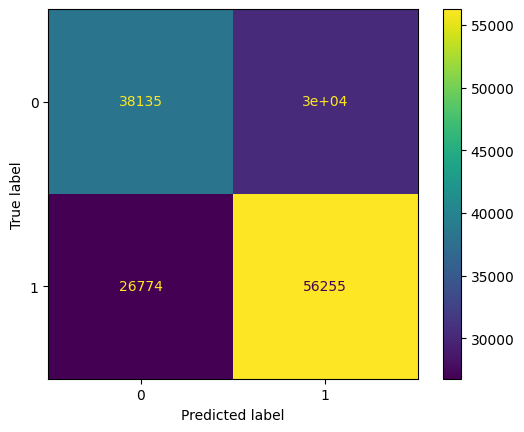

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = final_model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()


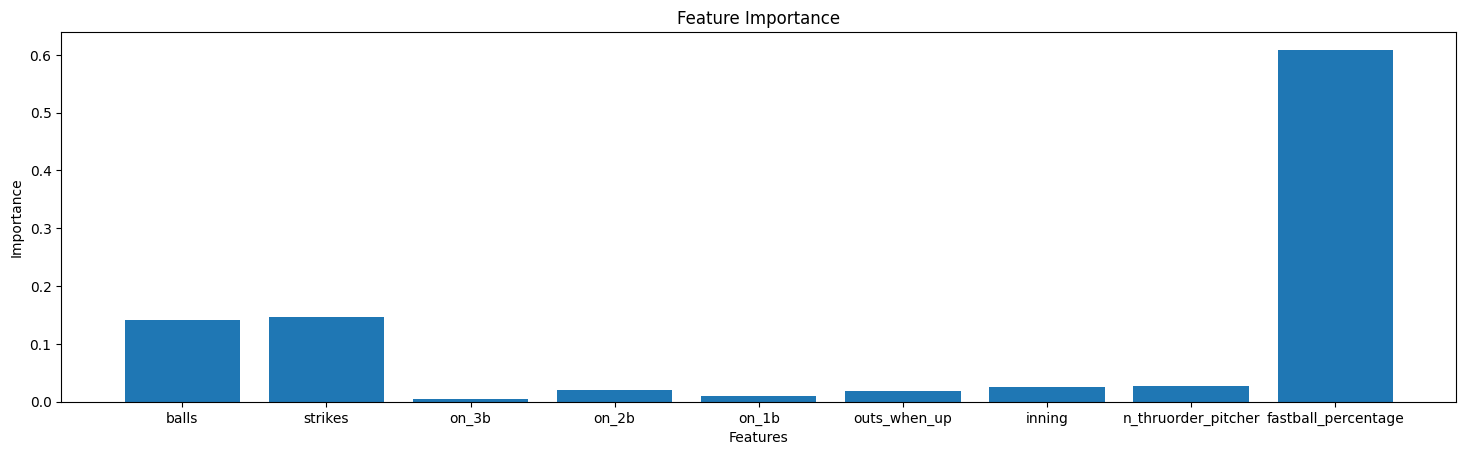

In [66]:
fig, ax = plt.subplots()
ax.bar(x=features, height=importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Feature Importance")
fig.set_figwidth(18)
plt.show()

In [68]:
len(data[data['fastball'] == 1])

415813

([<matplotlib.patches.Wedge at 0x30f00f040>,
 [Text(-0.16789379216536826, 1.0871116200981077, 'Fastball'),
  Text(0.1678938872036876, -1.0871116054203616, 'Offspeed/Breaking')],
 [Text(-0.09157843209020086, 0.5929699745989677, '54.9%'),
  Text(0.09157848392928414, -0.5929699665929243, '45.1%')])

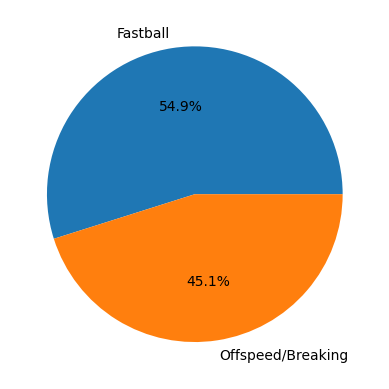

In [70]:
fig, ax = plt.subplots()
ax.pie([len(data[data['fastball'] == 1]), len(data[data['fastball'] == 0])], labels=['Fastball', 'Offspeed/Breaking'], autopct='%1.1f%%')

In [72]:
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {
    'accuracy' : accuracy,
    'recall' : recall,
    "f1" : f1
}

with open('metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

In [ ]:
import pickle 

with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)